In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import savefig
import glob
from IPython.display import display
import os
import sys
from datetime import date
import json
import numpy as np
import scipy
#import pingouin as pg 

In [2]:
cwd = os.getcwd()
PLOTS_PATH = './Plots/'
ANALYSIS_RESULTS = './Results/'
os.makedirs(os.path.dirname(cwd + PLOTS_PATH), exist_ok=True)
os.makedirs(os.path.dirname(cwd + ANALYSIS_RESULTS), exist_ok=True)

In [3]:
familiarity_df = pd.read_csv(f'{cwd}/Familiarity_Questionnaire.csv')

display(familiarity_df)

,Timestamp,Unnamed: 1,Gender,Age,Handedness,1. How familiar are you with this tool? [Please rate.],2. How familiar are you with this tool? [Please rate.],3. How familiar are you with this tool? [Please rate.],4. How familiar are you with this tool? [Please rate.],5. How familiar are you with this tool? [Please rate.],6. How familiar are you with this tool? [Please rate.],7. How familiar are you with this tool? [Please rate.],8. How familiar are you with this tool? [Please rate.],9. How familiar are you with this tool? [Please rate.],10. How familiar are you with this tool? [Please rate.],11. How familiar are you with this tool? [Please rate.],12. How familiar are you with this tool? [Please rate.]
0,11/17/2021 17:21:34,P002,Female,21,Right-handed,I have never used it or heard about it,I see it every week or every day,"I have seen it before, from once a year to onc...","I have seen it before, from once a year to onc...",I have never used it or heard about it,I have never used it or heard about it,"I have seen it before, from once a year to onc...","I have seen it before, from once a year to onc...",I have never used it or heard about it,"I have seen it before, from once a year to onc...",I have never used it or heard about it,I see it every week or every day
1,11/18/2021 17:21:02,P003,Female,23,Right-handed,I have never used it or heard about it,I see it every week or every day,I see it every week or every day,I know that it exists,I know that it exists,I have never used it or heard about it,I see it every week or every day,I see it every week or every day,I have never used it or heard about it,I see it every week or every day,I have never used it or heard about it,I see it every week or every day
2,11/19/2021 18:30:23,P004,Male,29,Right-handed,I have never used it or heard about it,I see it every week or every day,"I have seen it before, from once a year to onc...",I have seen it once or twice in my life,I have never used it or heard about it,I have never used it or heard about it,"I have seen it before, from once a year to onc...",I have seen it once or twice in my life,I have never used it or heard about it,"I have seen it before, from once a year to onc...",I have never used it or heard about it,I see it every week or every day
3,12/2/2021 13:53:14,S001,Male,30,Right-handed,I have seen it once or twice in my life,I see it every week or every day,I see it every week or every day,"I have seen it before, from once a year to onc...","I have seen it before, from once a year to onc...",I have seen it once or twice in my life,I see it every week or every day,I see it every week or every day,I have never used it or heard about it,"I have seen it before, from once a year to onc...",I have seen it once or twice in my life,I see it every week or every day
4,12/7/2021 13:33:54,S002,Female,19,Right-handed,I have never used it or heard about it,I see it every week or every day,"I have seen it before, from once a year to onc...",I know that it exists,I know that it exists,I have never used it or heard about it,"I have seen it before, from once a year to onc...",I see it every week or every day,I have never used it or heard about it,"I have seen it before, from once a year to onc...",I have never used it or heard about it,I see it every week or every day
5,12/8/2021 13:05:07,S003,Female,20,Right-handed,I have never used it or heard about it,I see it every week or every day,I see it every week or every day,"I have seen it before, from once a year to onc...",I have never used it or heard about it,I know that it exists,I see it every week or every day,"I have seen it before, from once a year to onc...",I have never used it or heard about it,"I have seen it before, from once a year to onc...","I have seen it before, from once a year to onc...",I see it every week or every day
6,12/9/2021 13:55:45,S004,Female,19,Right-handed,I have never used it or heard about it,I see it every week or every day,"I have seen it before, from once a year to onc..

In [4]:
familiarity_df.rename(columns={'1. How familiar are you with this tool? [Please rate.]': 'Fishscaler', 
                               '2. How familiar are you with this tool? [Please rate.]': 'Spatula',
                               '3. How familiar are you with this tool? [Please rate.]': 'Wrench',
                               '4. How familiar are you with this tool? [Please rate.]': 'Daisy Grubber',
                               '5. How familiar are you with this tool? [Please rate.]': 'Palette Knife',
                               '6. How familiar are you with this tool? [Please rate.]': 'Flower Cutter',
                               '7. How familiar are you with this tool? [Please rate.]': 'Screwdriver',
                               '8. How familiar are you with this tool? [Please rate.]': 'Paintbrush',
                               '9. How familiar are you with this tool? [Please rate.]': 'Spoke Wrench',
                               '10. How familiar are you with this tool? [Please rate.]': 'Trowel',
                               '11. How familiar are you with this tool? [Please rate.]': 'Lemon Zester',
                               '12. How familiar are you with this tool? [Please rate.]': 'Fork',
                               'Participant ID': 'ParticipantID'
                              }, inplace=True)

In [5]:
familiarity_df.columns

Index(['Timestamp', 'Unnamed: 1', 'Gender', 'Age', 'Handedness', 'Fishscaler',
       'Spatula', 'Wrench', 'Daisy Grubber', 'Palette Knife', 'Flower Cutter',
       'Screwdriver', 'Paintbrush', 'Spoke Wrench', 'Trowel', 'Lemon Zester',
       'Fork'],
      dtype='object')

In [6]:
familiarity_df.rename(columns={'Unnamed: 1':'subject_id'}, inplace=True)

In [7]:
familiarity_df = familiarity_df.drop_duplicates(subset=['subject_id'], keep='first')

In [8]:
for index in range(familiarity_df.shape[1])[5:]:
       print('Column Number : ', index)
       # Select column by index position using iloc[]
       columnSeriesObj = familiarity_df.iloc[:, index]
       print('Column : ', columnSeriesObj.name)

Column Number :  5
Column :  Fishscaler
Column Number :  6
Column :  Spatula
Column Number :  7
Column :  Wrench
Column Number :  8
Column :  Daisy Grubber
Column Number :  9
Column :  Palette Knife
Column Number :  10
Column :  Flower Cutter
Column Number :  11
Column :  Screwdriver
Column Number :  12
Column :  Paintbrush
Column Number :  13
Column :  Spoke Wrench
Column Number :  14
Column :  Trowel
Column Number :  15
Column :  Lemon Zester
Column Number :  16
Column :  Fork


In [9]:
familiarity_level = {'I have never used it or heard about it':'1', 
                     'I know that it exists':'2', 
                     'I have seen it once or twice in my life':'3',
                     'I have seen it before, from once a year to once a month':'4',
                     'I see it every week or every day':'5'
                    }

In [10]:
# for index in range(familiarity_df.shape[1])[5:]:
#     columnSeriesObj = familiarity_df.iloc[:, index]
#     familiarity_df[columnSeriesObj.name] = familiarity_df[columnSeriesObj.name].map(familiarity_level)
tools = ['Fishscaler', 'Spatula', 'Wrench', 'Daisy Grubber', 'Palette Knife',
       'Flower Cutter', 'Screwdriver', 'Paintbrush', 'Spoke Wrench', 'Trowel',
       'Lemon Zester', 'Fork']  
for col in familiarity_df.columns:
    if col in tools:
        familiarity_df[col] = familiarity_df[col].map(familiarity_level)
familiarity_df.head()

,Timestamp,subject_id,Gender,Age,Handedness,Fishscaler,Spatula,Wrench,Daisy Grubber,Palette Knife,Flower Cutter,Screwdriver,Paintbrush,Spoke Wrench,Trowel,Lemon Zester,Fork
0,11/17/2021 17:21:34,P002,Female,21,Right-handed,1,5,4,4,1,1,4,4,1,4,1,5
1,11/18/2021 17:21:02,P003,Female,23,Right-handed,1,5,5,2,2,1,5,5,1,5,1,5
2,11/19/2021 18:30:23,P004,Male,29,Right-handed,1,5,4,3,1,1,4,3,1,4,1,5
3,12/2/2021 13:53:14,S001,Male,30,Right-handed,3,5,5,4,4,3,5,5,1,4,3,5
4,12/7/2021 13:33:54,S002,Female,19,Right-handed,1,5,4,2,2,1,4,5,1,4,1,5


In [11]:
familiarity_df = familiarity_df.loc[familiarity_df.subject_id.str.startswith('M')]
familiarity_df = familiarity_df.query('subject_id not in ["M001", "M002", "M003", "M004", "M005"]')

In [12]:
display(familiarity_df['Gender'].value_counts())
display(familiarity_df['Handedness'].value_counts())

Female    18
Male       7
Name: Gender, dtype: int64

Right-handed    25
Name: Handedness, dtype: int64

In [13]:
display(familiarity_df.head())

,Timestamp,subject_id,Gender,Age,Handedness,Fishscaler,Spatula,Wrench,Daisy Grubber,Palette Knife,Flower Cutter,Screwdriver,Paintbrush,Spoke Wrench,Trowel,Lemon Zester,Fork
13,6/27/2022 12:39:27,M006,Male,32,Right-handed,1,4,2,1,1,1,4,3,1,2,1,5
14,6/28/2022 13:10:02,M007,Female,21,Right-handed,1,5,4,1,3,1,4,4,1,4,1,5
15,7/1/2022 12:00:30,M008,Female,25,Right-handed,1,5,4,1,1,1,4,4,1,3,1,5
16,7/15/2022 12:52:39,M009,Male,29,Right-handed,1,5,4,1,3,1,5,4,1,4,3,5
17,7/18/2022 16:32:15,M010,Female,27,Right-handed,1,5,4,1,2,1,4,4,1,4,1,5


In [14]:
def label_tools(tool):
    familiar_tools = ['Spatula', 'Wrench','Screwdriver', 'Paintbrush', 'Trowel', 'Fork'] 
    
    if tool in familiar_tools:
        return 'familiar'
    else:
        return 'unfamiliar'
    
ratings_df = (
    familiarity_df
#     .reset_index()
    .melt(id_vars = ('subject_id'), value_vars = tools, var_name='tool', value_name='familiarity_rating')
)
ratings_df['familiarity'] = ratings_df.tool.apply(label_tools)
ratings_df.familiarity_rating = ratings_df.familiarity_rating.astype(int)
ratings_df = ratings_df.query('subject_id not in ["M001", "M002", "M003", "M004", "M005"]') # removing pilot participants
ratings_df.head()

,subject_id,tool,familiarity_rating,familiarity
0,M006,Fishscaler,1,unfamiliar
1,M007,Fishscaler,1,unfamiliar
2,M008,Fishscaler,1,unfamiliar
3,M009,Fishscaler,1,unfamiliar
4,M010,Fishscaler,1,unfamiliar


In [15]:
ratings_df.groupby(['familiarity',]).agg({'familiarity_rating':['mean', 'std']})

familiarity_rating          
                          mean       std
familiarity                             
familiar              4.413333  0.647003
unfamiliar            1.253333  0.657294

In [16]:
ratings_df.groupby(['familiarity', 'tool']).agg({'familiarity_rating':['mean', 'std']})

familiarity_rating          
                                        mean       std
familiarity tool                                      
familiar    Fork                        5.00  0.000000
            Paintbrush                  4.12  0.525991
            Screwdriver                 4.32  0.476095
            Spatula                     4.96  0.200000
            Trowel                      4.00  0.707107
            Wrench                      4.08  0.702377
unfamiliar  Daisy Grubber               1.36  0.810350
            Fishscaler                  1.36  0.810350
            Flower Cutter               1.04  0.200000
            Lemon Zester                1.24  0.723418
            Palette Knife               1.48  0.770281
            Spoke Wrench                1.04  0.200000

In [17]:
tmpdf = (
    ratings_df
    .groupby(['subject_id', 'familiarity',], as_index=True)
    .familiarity_rating
    .mean()
    .reset_index()
    .pivot(index='subject_id', columns='familiarity', values='familiarity_rating')
    .reset_index()
)

scipy.stats.ttest_ind(tmpdf['familiar'], tmpdf['unfamiliar'])

Ttest_indResult(statistic=33.13254400604795, pvalue=9.98766337435531e-35)

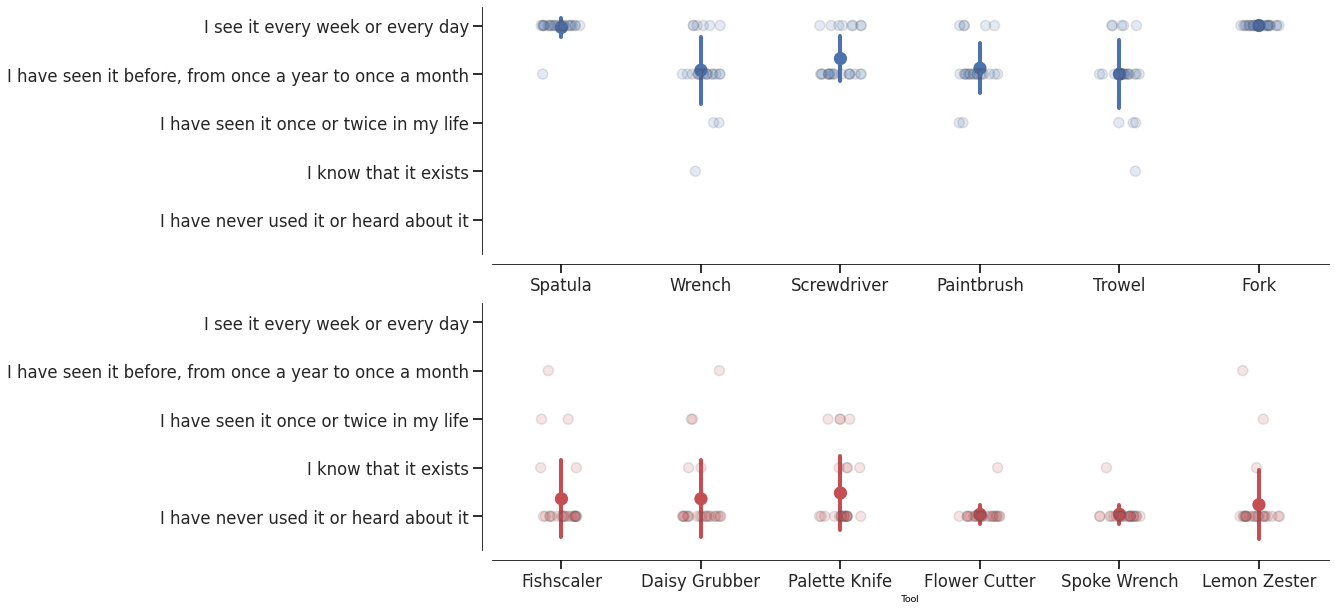

In [18]:
_, ax = plt.subplots(2, 1, figsize=(15,10), sharey=True)

sns.set(
    palette='muted', 
    context='talk', 
    style='ticks', 
    rc={'font.family':'DejaVu Sans', 'font.weight':'medium'}
)

colors = sns.color_palette(palette='deep', n_colors=7)

familiar_tools = ['Spatula', 'Wrench','Screwdriver', 'Paintbrush', 'Trowel', 'Fork', ]  


ax[0] = sns.stripplot(
    data=ratings_df.query("tool in @familiar_tools"),
    y='familiarity_rating',
    x='tool',
    color=colors[0],
    jitter=0.15,
    size=10,
    linewidth=1.5,
    alpha=0.15,
    ax=ax[0]
)

ax[0] = sns.pointplot(
    data=ratings_df.query("tool in @familiar_tools"),
    y='familiarity_rating',
    x='tool',  
    color=colors[0],
    join=False,
    ci='sd',
#     capsize=0.05,
    ax=ax[0]

)


ax[1] = sns.stripplot(
    data=ratings_df.query("tool not in @familiar_tools"),
    y='familiarity_rating',
    x='tool',  
     color=colors[3],
    jitter=0.15,
    size=10,
    linewidth=1.5,
    alpha=0.15,
    ax=ax[1]
)

ax[1] = sns.pointplot(
    data=ratings_df.query("tool not in @familiar_tools"),
    y='familiarity_rating',
    x='tool',  
    color=colors[3],
    join=False,
    ci='sd',
#     capsize=0.05,
    ax=ax[1]
)

ax[0].set(
    xlabel='',
    yticks=[1,2,3,4,5],
    yticklabels=familiarity_level.keys(),
    ylabel=''
)
ax[1].set(
    xlabel='Tool',
    yticks=[1,2,3,4,5],
    yticklabels=familiarity_level.keys(),
    ylabel=''
)
# ax.legend(bbox_to_anchor=[1, 1])
sns.despine(offset=10)

ax[0].legend([],[], frameon=False)
ax[1].legend([],[], frameon=False)



plt.savefig(f'./familiarity_rating.png', transparent=True, bbox_inches='tight')